In [ ]:
!pip install librosa
import os
import librosa
import numpy as np
import pandas as pd
from google.colab import drive
import random

# Mount Google Drive
drive.mount('/content/drive')


main_folder_path = '/content/drive/My Drive/Audio_Data'


subfolders = ['testing', 'training', 'validation']

# Collect all audio files from fake and real subfolders
audio_files = []
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)
    if os.path.exists(subfolder_path):

        fake_folder = os.path.join(subfolder_path, 'fake')
        real_folder = os.path.join(subfolder_path, 'real')

        # Collect all audio files in "fake" and "real" folders
        if os.path.exists(fake_folder):
            fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith('.wav')]
            audio_files.extend(fake_files)
        if os.path.exists(real_folder):
            real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith('.wav')]
            audio_files.extend(real_files)


random.shuffle(audio_files)


num_files_to_process = int(len(audio_files) * 0.1)
audio_files_subset = audio_files[:num_files_to_process]

print(f"Found {len(audio_files)} audio files across {len(subfolders)} subfolders.")
print(f"Processing {len(audio_files_subset)} files (10% of the data).")

def extract_audio_features(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)


        # Extract MFCCs (13 coefficients)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)

        # Extract Chroma features (1 bins)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)

        # Extract Mel Spectrogram (1 bins)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)

        # Extract Spectral Contrast (1 bins)
        contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

        # Combine features into a single array
        features = np.hstack([mfccs, chroma, mel, contrast])
        return features
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Data list to hold extracted features
data = []

# Iterate through the subset of audio files for feature extraction
for audio_file in audio_files_subset:
    features = extract_audio_features(audio_file)
    if features is not None:

        label = 'fake' if 'fake' in audio_file else 'real'
        data.append([audio_file, label] + list(features))
    else:
        print(f"Skipping {audio_file} due to errors.")


print(f"Extracted features for {len(data)} files")

# Define column names
columns = ['Filename', 'Label'] + [f'MFCC_{i+1}' for i in range(13)] + \
          [f'Chroma_{i+1}' for i in range(12)] + \
          [f'Mel_{i+1}' for i in range(128)] + \
          [f'Contrast_{i+1}' for i in range(7)]


# Create DataFrame from the features
df = pd.DataFrame(data, columns=columns)

# Preview the DataFrame
print(df.head())

# Save the features to a CSV file
output_csv = '/content/drive/My Drive/audio_features.csv'
df.to_csv(output_csv, index=False)
print(f"Features saved to {output_csv}")

Mounted at /content/drive
Found 17880 audio files across 3 subfolders.
Processing 1788 files (10% of the data).


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Extracted features for 1788 files
                                            Filename Label      MFCC_1  \
0  /content/drive/My Drive/Audio_Data/validation/...  real -242.804337   
1  /content/drive/My Drive/Audio_Data/training/fa...  fake -118.691948   
2  /content/drive/My Drive/Audio_Data/testing/fak...  fake -132.758835   
3  /content/drive/My Drive/Audio_Data/training/re...  real -180.462082   
4  /content/drive/My Drive/Audio_Data/validation/...  real -196.154175   

       MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6     MFCC_7  \
0   65.929535   1.992644  19.815994 -25.298344 -14.259764 -35.846851   
1   68.720406 -15.786934   4.867203 -19.743681 -10.039001 -19.100609   
2  107.576263 -10.481115  11.670965  -5.431490   1.684912  -9.076093   
3  105.135109  -1.061362  34.940231   5.891135   7.528842 -10.599346   
4  125.325432  19.771627  28.624958  -1.351007   3.858538  -0.899917   

      MFCC_8  ...   Mel_126   Mel_127   Mel_128  Contrast_1  Contrast_2  \
0 -26.230259 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Waveform Visualization

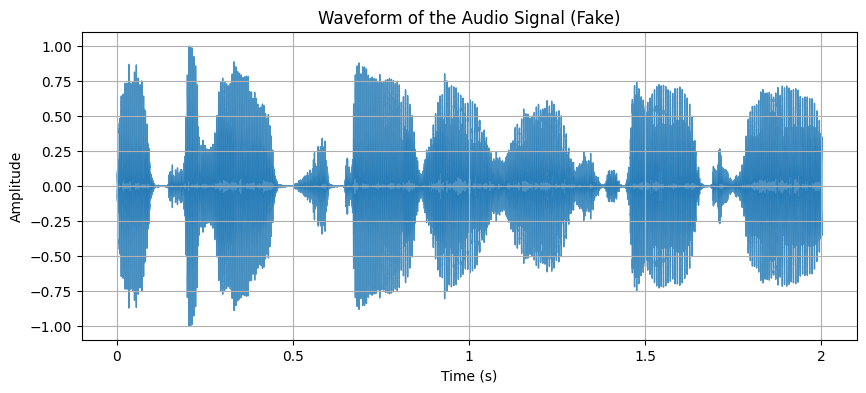

Randomly selected file: /content/drive/MyDrive/Audio_Data/testing/fake/file966.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Label: fake


In [ ]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define paths to the fake and real folders
fake_folder = "/content/drive/MyDrive/Audio_Data/testing/fake"
real_folder = "/content/drive/MyDrive/Audio_Data/testing/real"

# Get list of all audio files in both folders
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Combine files into one list with labels
all_files = fake_files + real_files
labels = ['fake'] * len(fake_files) + ['real'] * len(real_files)

# Randomly select an audio file and its label
random_index = random.randint(0, len(all_files) - 1)
random_file = all_files[random_index]
label = labels[random_index]

# Load the randomly selected audio file
signal, sr = librosa.load(random_file, sr=None)  # Load the file with its original sampling rate

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr, alpha=0.8)
plt.title(f"Waveform of the Audio Signal ({label.capitalize()})")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print(f"Randomly selected file: {random_file}")
print(f"Label: {label}")


 Zoom into a Segment

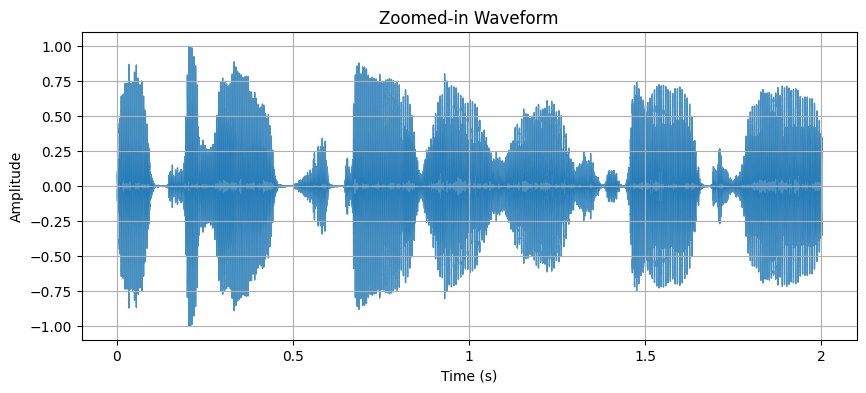

In [ ]:
start_sample = 0
end_sample = sr * 5  # 5 seconds
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal[start_sample:end_sample], sr=sr, alpha=0.8)
plt.title("Zoomed-in Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Stereo/Mono Plotting

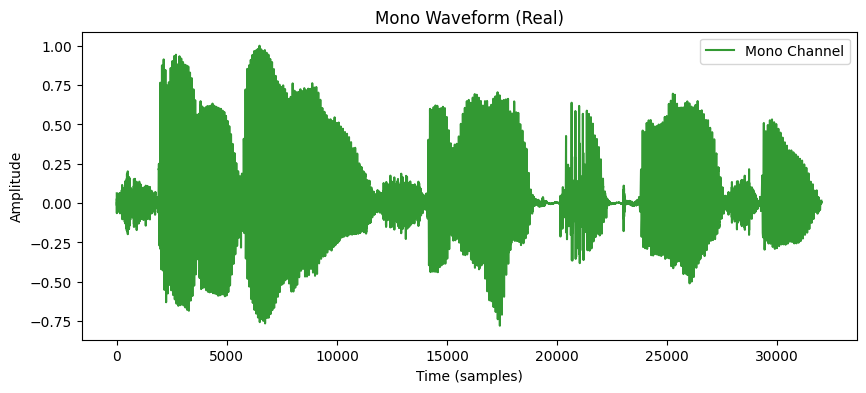

Randomly selected file: /content/drive/MyDrive/Audio_Data/testing/real/file2193.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Label: real
Sampling rate: 16000


In [ ]:
import os
import random
import soundfile as sf
import matplotlib.pyplot as plt

# Define paths to the fake and real folders
fake_folder = "/content/drive/MyDrive/Audio_Data/testing/fake"
real_folder = "/content/drive/MyDrive/Audio_Data/testing/real"

# Get list of all audio files in both folders
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Combine files into one list with labels
all_files = fake_files + real_files
labels = ['fake'] * len(fake_files) + ['real'] * len(real_files)

# Randomly select an audio file and its label
random_index = random.randint(0, len(all_files) - 1)
random_file = all_files[random_index]
label = labels[random_index]

# Load the audio file
signal, sr = sf.read(random_file)

# Plot waveform based on audio type (stereo or mono)
if len(signal.shape) == 2:  # Stereo audio
    plt.figure(figsize=(10, 4))
    plt.plot(signal[:, 0], alpha=0.8, label='Left Channel', color='blue')
    plt.plot(signal[:, 1], alpha=0.8, label='Right Channel', color='orange')
    plt.title(f"Stereo Waveform ({label.capitalize()})")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()
else:  # Mono audio
    plt.figure(figsize=(10, 4))
    plt.plot(signal, alpha=0.8, label='Mono Channel', color='green')
    plt.title(f"Mono Waveform ({label.capitalize()})")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

# Print details of the selected audio file
print(f"Randomly selected file: {random_file}")
print(f"Label: {label}")
print(f"Sampling rate: {sr}")



Waveform and Spectrogram Comparison

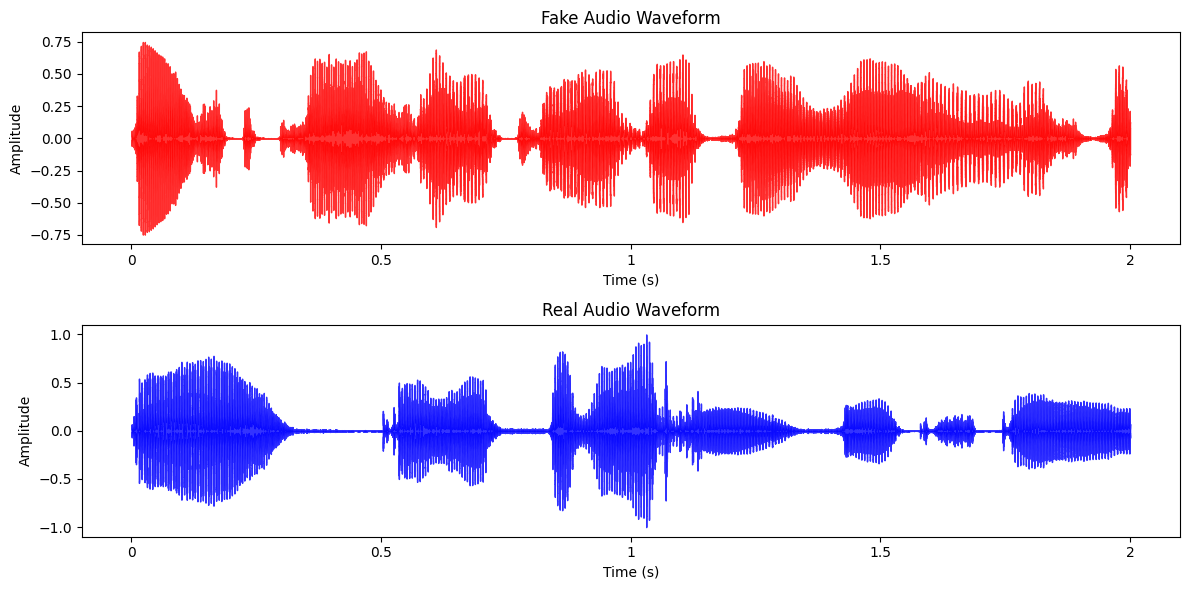

<ipython-input-38-edf5244dc578>:53: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  fake_spectrogram = librosa.amplitude_to_db(librosa.stft(fake_signal), ref=np.max)
<ipython-input-38-edf5244dc578>:60: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  real_spectrogram = librosa.amplitude_to_db(librosa.stft(real_signal), ref=np.max)


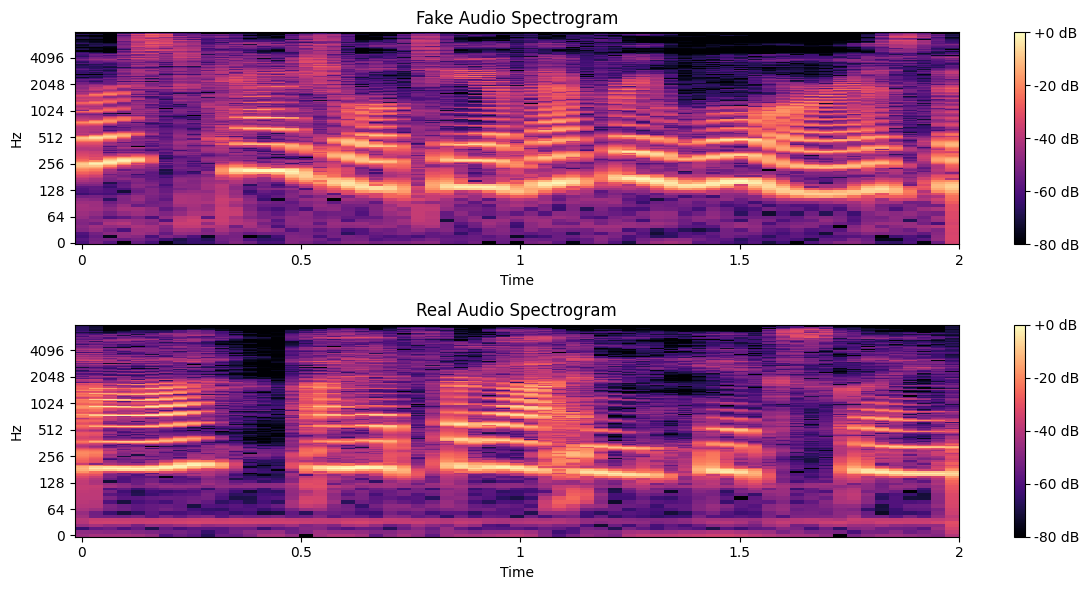

Fake file: /content/drive/MyDrive/Audio_Data/testing/fake/file435.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Real file: /content/drive/MyDrive/Audio_Data/testing/real/file2219.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav


In [ ]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define paths to fake and real folders
fake_folder = "/content/drive/MyDrive/Audio_Data/testing/fake"
real_folder = "/content/drive/MyDrive/Audio_Data/testing/real"

# Get list of audio files
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Randomly select one file from each folder
fake_file = random.choice(fake_files)
real_file = random.choice(real_files)

# Load audio files
fake_signal, fake_sr = librosa.load(fake_file, sr=None)
real_signal, real_sr = librosa.load(real_file, sr=None)

# Ensure both signals have the same length (for fair comparison)
min_length = min(len(fake_signal), len(real_signal))
fake_signal = fake_signal[:min_length]
real_signal = real_signal[:min_length]

# Plot waveforms
plt.figure(figsize=(12, 6))

# Fake waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(fake_signal, sr=fake_sr, alpha=0.8, color="red")
plt.title("Fake Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Real waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(real_signal, sr=real_sr, alpha=0.8, color="blue")
plt.title("Real Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Plot spectrograms
plt.figure(figsize=(12, 6))

# Fake spectrogram
plt.subplot(2, 1, 1)
fake_spectrogram = librosa.amplitude_to_db(librosa.stft(fake_signal), ref=np.max)
librosa.display.specshow(fake_spectrogram, sr=fake_sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Fake Audio Spectrogram")

# Real spectrogram
plt.subplot(2, 1, 2)
real_spectrogram = librosa.amplitude_to_db(librosa.stft(real_signal), ref=np.max)
librosa.display.specshow(real_spectrogram, sr=real_sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Real Audio Spectrogram")

plt.tight_layout()
plt.show()

# Print file details
print(f"Fake file: {fake_file}")
print(f"Real file: {real_file}")


Zero-Crossing Rate

In [ ]:
fake_zcr = librosa.feature.zero_crossing_rate(fake_signal)[0]
real_zcr = librosa.feature.zero_crossing_rate(real_signal)[0]
print("Fake ZCR:", fake_zcr.mean())
print("Real ZCR:", real_zcr.mean())

Fake ZCR: 0.1295107886904762
Real ZCR: 0.11866009424603174


Spectral Centroid

In [ ]:
fake_centroid = librosa.feature.spectral_centroid(y=fake_signal, sr=fake_sr)[0]
real_centroid = librosa.feature.spectral_centroid(y=real_signal, sr=real_sr)[0]

print("Fake Spectral Centroid (Mean):", fake_centroid.mean())
print("Real Spectral Centroid (Mean):", real_centroid.mean())



Fake Spectral Centroid (Mean): 1734.0239793131502
Real Spectral Centroid (Mean): 1640.4628182898543


MFCCs

In [ ]:
fake_mfccs = librosa.feature.mfcc(y=fake_signal, sr=fake_sr, n_mfcc=13)
real_mfccs = librosa.feature.mfcc(y=real_signal, sr=real_sr, n_mfcc=13)

print("Fake MFCCs Shape:", fake_mfccs.shape)
print("Real MFCCs Shape:", real_mfccs.shape)



Fake MFCCs Shape: (13, 63)
Real MFCCs Shape: (13, 63)


Mel Spectrogram

Randomly selected file: /content/drive/MyDrive/Audio_Data/testing/real/file396.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Label: real
Loaded audio file with sampling rate: 16000


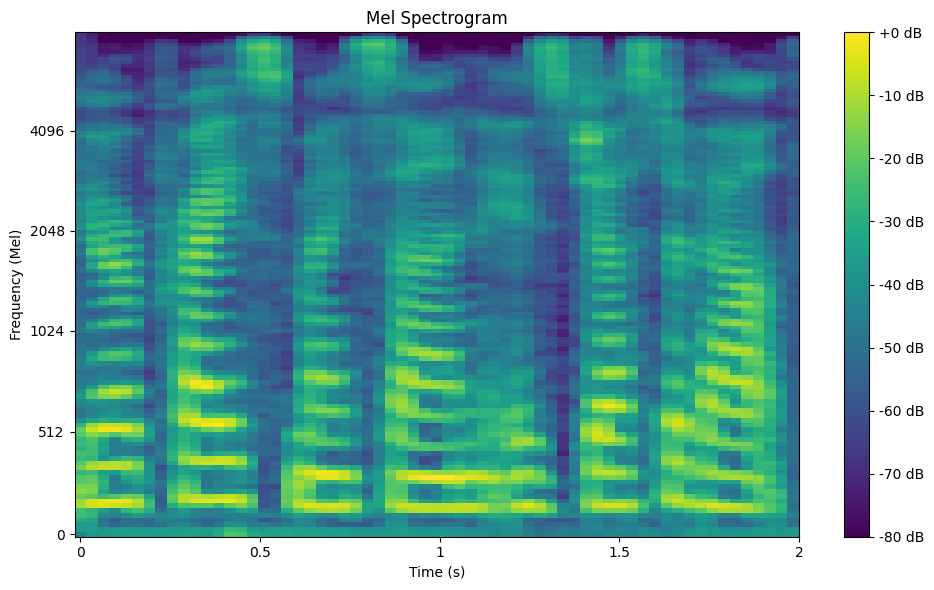

In [ ]:
import os
import random

# Define paths to fake and real folders
fake_folder = "/content/drive/MyDrive/Audio_Data/testing/fake"
real_folder = "/content/drive/MyDrive/Audio_Data/testing/real"

# Get list of all audio files in both folders
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Combine files into one list with labels
all_files = fake_files + real_files
labels = ['fake'] * len(fake_files) + ['real'] * len(real_files)

# Pick a random file
random_index = random.randint(0, len(all_files) - 1)
random_file = all_files[random_index]
label = labels[random_index]

print(f"Randomly selected file: {random_file}")
print(f"Label: {label}")

# Load the random audio file
import librosa
signal, sr = librosa.load(random_file, sr=None)
print(f"Loaded audio file with sampling rate: {sr}")

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to decibels for better visualization
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Mel)")
plt.tight_layout()
plt.show()


Zoom into a Specific Time Range

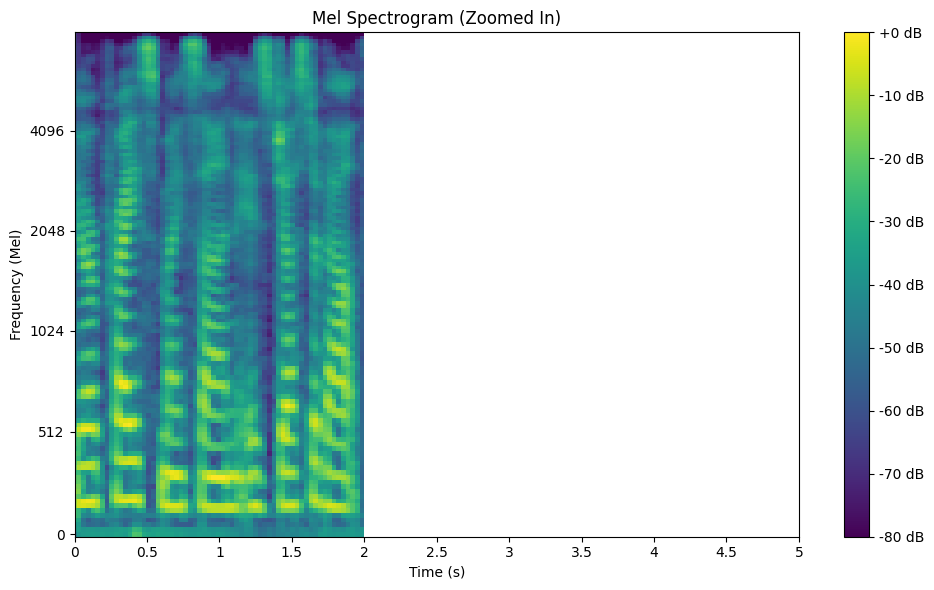

In [ ]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.xlim(0, 5)  # Zoom into the first 5 seconds
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (Zoomed In)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Mel)")
plt.tight_layout()
plt.show()

EDA AND FEATURE ENGINEERING

In [ ]:
df

,Filename,Label,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_126,Mel_127,Mel_128,Contrast_1,Contrast_2,Contrast_3,Contrast_4,Contrast_5,Contrast_6,Contrast_7
0,/content/drive/My Drive/Audio_Data/validation/...,real,-242.804337,65.929535,1.992644,19.815994,-25.298344,-14.259764,-35.846851,-26.230259,...,0.091053,0.036616,0.002847,27.309525,16.736789,20.038659,18.846842,20.308695,22.579609,27.219332
1,/content/drive/My Drive/Audio_Data/training/fa...,fake,-118.691948,68.720406,-15.786934,4.867203,-19.743681,-10.039001,-19.100609,-0.302762,...,0.098339,0.090665,0.004075,18.705260,21.588300,22.265668,21.184118,22.182973,23.396272,31.948473
2,/content/drive/My Drive/Audio_Data/testing/fak...,fake,-132.758835,107.576263,-10.481115,11.670965,-5.431490,1.684912,-9.076093,-4.928747,...,0.095084,0.050981,0.005500,27.675077,18.706402,21.352158,18.306175,18.421890,19.572002,28.462022
3,/content/drive/My Drive/Audio_Data/training/re...,real,-180.462082,105.135109,-1.061362,34.940231,5.891135,7.528842,-10.599346,-4.644063,...,0.005860,0.003329,0.000132,16.330674,13.437548,18.260864,15.634816,17.109264,19.634393,28.536360
4,/content/drive/My Drive/Audio_Data/validation/...,real,-196.154175,125.325432,19.771627,28.624958,-1.351007,3.858538,-0.899917,-0.739368,...,0.007540,0.004422,0.000403,20.808755,14.070448,17.273126,16.966392,17.428369,17.695099,19.111081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,/content/drive/My Drive/Audio_Data/training/re...,real,-148.775650,66.337280,-3.396580,12.152565,-28.799976,-12.208276,-33.350677,-36.920467,...,0.438497,0.246259,0.030898,25.967692,18.695790,22.998343,19.403553,20.105811,23.120447,30.206981
1784,/content/drive/My Drive/Audio_Data/testing/fak...,fake,-139.179260,86.693642,-12.346825,0.094109,-4.159046,9.939808,-2.276300,-5.260672,...,0.222914,0.145449,0.008581,25.197934,19.724039,18.760554,17.734739,17.303715,19.208965,29.822751
1785,/content/drive/My Drive/Audio_Data/validation/...,fake,-243.726791,162.285416,-25.688890,37.493229,-22.598986,-6.218958,-3.564507,-22.754755,...,0.000010,0.000010,0.000010,26.361351,16.451173,21.375354,20.154083,25.429566,35.373739,12.659509
1786,/content/drive/My Drive/Audio_Data/training/re...,real,-161.879486,89.791031,6.836524,46.113350,6.402040,-6.057809,3.935013,-14.712011,...,0.036018,0.019800,0.000506,23.854323,18.222116,21.956394,15.942107,16.828187,21.560613,30.519417


In [ ]:
df.sample()


,Filename,Label,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_126,Mel_127,Mel_128,Contrast_1,Contrast_2,Contrast_3,Contrast_4,Contrast_5,Contrast_6,Contrast_7
996,/content/drive/My Drive/Audio_Data/training/re...,real,-235.602753,104.595901,38.236553,45.450142,13.274167,9.232942,-11.417139,4.781882,...,0.008477,0.000404,0.000012,19.951521,13.104722,18.830746,14.809608,16.185423,16.14341,28.13134


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Columns: 162 entries, Filename to Contrast_7
dtypes: float64(160), object(2)
memory usage: 2.2+ MB


In [ ]:
df.describe(include='all')

,Filename,Label,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_126,Mel_127,Mel_128,Contrast_1,Contrast_2,Contrast_3,Contrast_4,Contrast_5,Contrast_6,Contrast_7
count,1788,1788,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,...,1.788000e+03,1.788000e+03,1.788000e+03,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
unique,1788,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/content/drive/My Drive/Audio_Data/validation/...,fake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-182.443140,93.667172,-5.256249,27.079073,-14.765600,-4.136451,-14.893760,-10.723093,...,2.307618e-01,1.242186e-01,9.222614e-03,22.894144,18.399482,20.826676,18.544713,19.747225,23.163081,27.959794
std,NaN,NaN,47.743982,30.545826,19.576886,18.020775,16.031266,13.889399,11.631220,11.477449,...,7.476158e-01,4.285015e-01,3.443624e-02,3.622668,2.434217,2.375745,2.019131,2.917959,5.446096,6.549729
min,NaN,NaN,-447.562469,-1.517615,-91.189331,-32.001240,-61.806721,-49.418358,-51.347397,-44.252407,...,1.457744e-07,1.398772e-07,1.489391e-07,12.073611,11.190805,12.588605,13.191386,13.604983,14.164802,11.056272
25%,NaN,NaN,-211.285881,73.657370,-19.319839,14.249955,-26.852185,-12.903893,-23.650276,-19.038703,...,3.312708e-05,1.630524e-05,1.225873e-05,20.294133,16.798577,19.245179,17.073677,17.971555,19.351323,26.192125
50%,NaN,NaN,-178.593475,89.568737,-3.211799,27.468039,-15.813008,-2.046027,-14.609715,-10.396728,...,5.926149e-03,1.378005e-03,9.484568e-05,22.516764,18.491843,20.704607,18.333646,19.091897,22.102455,29.732277
75%,NaN,NaN,-148.737873,110.749649,9.158971,40.798690,-1.989352,5.852851,-6.869062,-2.782909,...,9.309333e-02,4.428440e-02,3.347036e-03,25.386088,20.001184,22.380173,19.807765,20.419731,24.523904,32.268974


In [ ]:
df.shape

(1788, 162)

In [ ]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [ ]:
df.value_counts("Label")

,count
Label,
fake,910
real,878


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

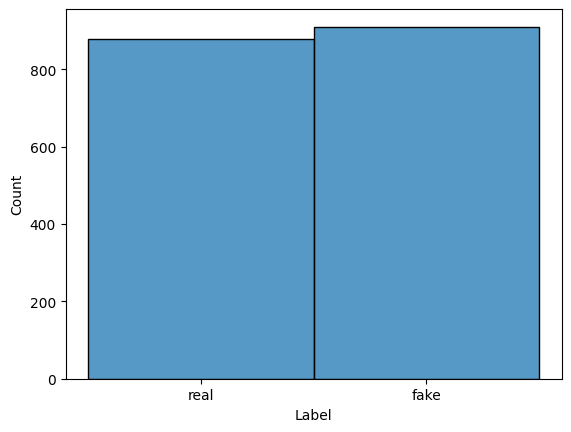

In [ ]:
sns.histplot(df['Label'])
plt.show()

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = "/content/drive/My Drive/audio_features.csv"
data = pd.read_csv(file_path)

In [ ]:
# Basic EDA
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)


Dataset Shape: (1788, 162)
Columns: Index(['Filename', 'Label', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5',
       'MFCC_6', 'MFCC_7', 'MFCC_8',
       ...
       'Mel_126', 'Mel_127', 'Mel_128', 'Contrast_1', 'Contrast_2',
       'Contrast_3', 'Contrast_4', 'Contrast_5', 'Contrast_6', 'Contrast_7'],
      dtype='object', length=162)


In [ ]:
## Check for missing values
df.isnull().sum()

,0
Filename,0
Label,0
MFCC_1,0
MFCC_2,0
MFCC_3,0
...,...
Contrast_3,0
Contrast_4,0
Contrast_5,0
Contrast_6,0


Visualize Label Distribution

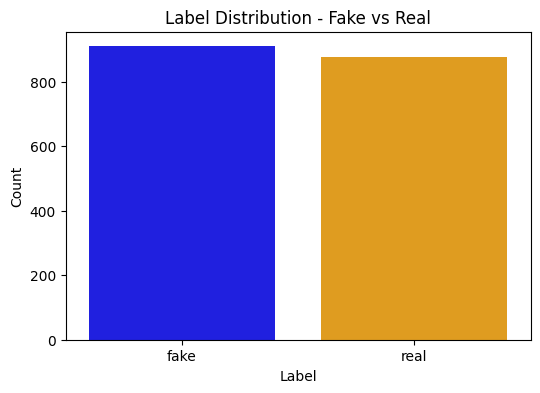

In [ ]:
# Separate the counts for 'fake' and 'real' labels
fake_count = data[data['Label'] == 'fake'].shape[0]
real_count = data[data['Label'] == 'real'].shape[0]

# Create a new DataFrame to display these counts
label_data = pd.DataFrame({
    'Label': ['fake', 'real'],
    'Count': [fake_count, real_count]
})

# Visualize the label distribution with custom colors (blue for 'fake', orange for 'real')
plt.figure(figsize=(6, 4))
sns.barplot(x='Label', y='Count', data=label_data, hue='Label', palette=["blue", "orange"], legend=False)
plt.title("Label Distribution - Fake vs Real")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()



Feature Distribution

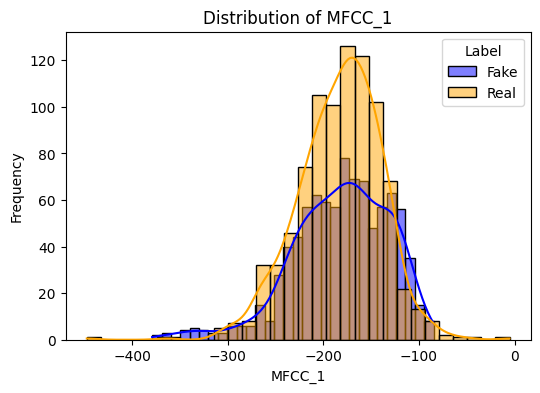

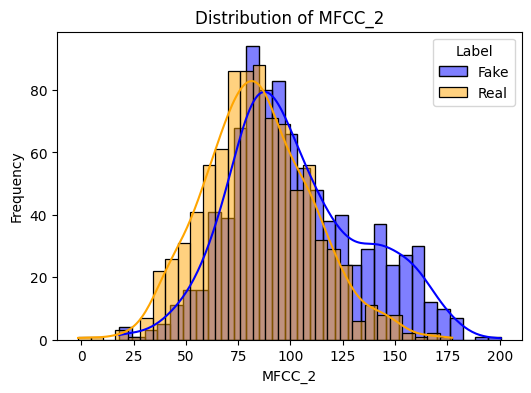

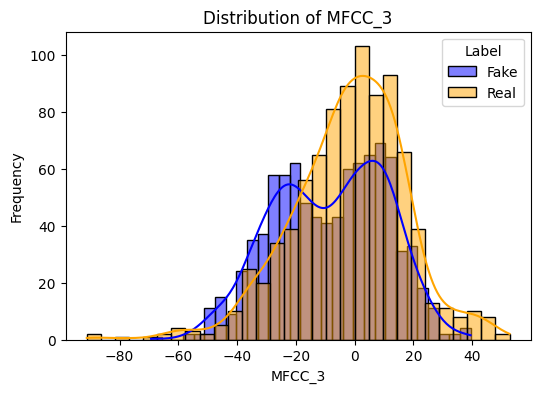

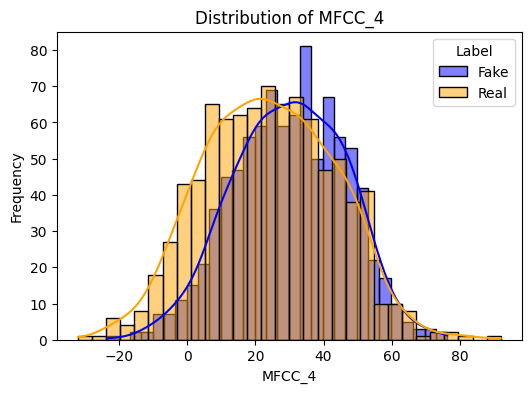

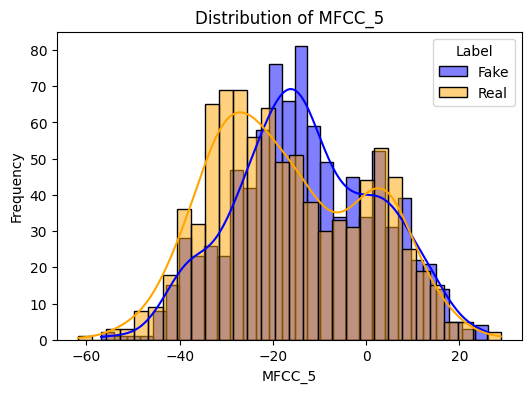

In [ ]:
# Separate the numerical features (excluding 'Filename' and 'Label')
numerical_features = data.drop(columns=["Filename", "Label"])

# Visualize distribution for 'fake' and 'real' labels separately
for col in numerical_features.columns[:5]:
    # For 'fake' label
    plt.figure(figsize=(6, 4))
    sns.histplot(data[data['Label'] == 'fake'][col], kde=True, bins=30, color="blue", label="Fake")

    # For 'real' label
    sns.histplot(data[data['Label'] == 'real'][col], kde=True, bins=30, color="orange", label="Real")

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(title="Label")
    plt.show()



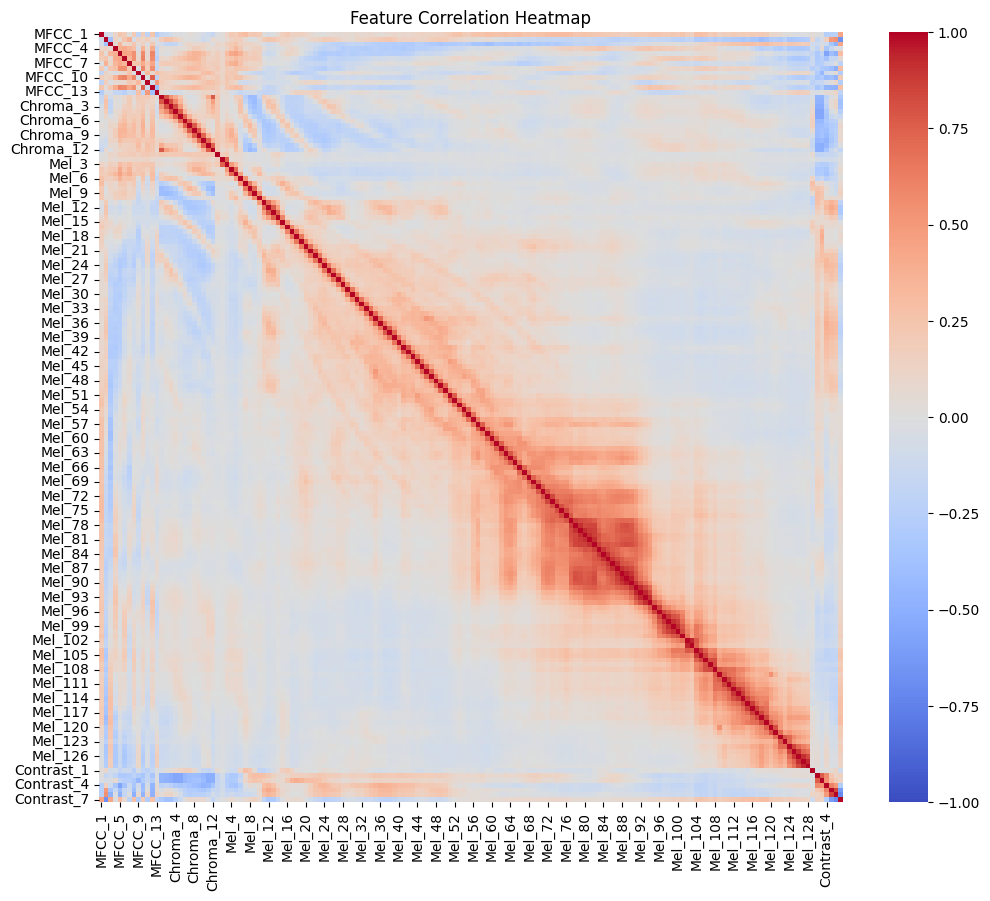

In [ ]:
# Correlation Analysis
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", vmax=1, vmin=-1, center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

In [ ]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Keep 95% variance
principal_components = pca.fit_transform(scaled_df)
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)


PCA Explained Variance Ratio: [0.13506832 0.10382616 0.06822689 0.04703345 0.04224606 0.03874449
 0.02971611 0.02623573 0.02297542 0.02014779 0.01909511 0.01741736
 0.01676342 0.01516882 0.01348886 0.01332623 0.01220549 0.01196843
 0.01159071 0.01098608 0.01051796 0.01020208 0.0096282  0.00919784
 0.00873916 0.00862169 0.00839414 0.00826316 0.00788253 0.00734978
 0.00715629 0.00694407 0.00678251 0.00653527 0.00636581 0.00612118
 0.00595022 0.00585577 0.00552733 0.00547783 0.00517344 0.00505482
 0.00491665 0.00480214 0.00446223 0.00435434 0.00415814 0.00410005
 0.00397411 0.00385762 0.00371462 0.00358187 0.00346305 0.00328644
 0.00318483 0.00306723 0.0030264  0.00294509 0.0029034  0.00271728
 0.00263985 0.00261321 0.0026008  0.00253829 0.00247208 0.00241757
 0.00233948 0.00230448 0.00225006 0.00212818 0.00208379 0.00207604
 0.00195603 0.00192043 0.00188089 0.00179101 0.00177471 0.00171968
 0.00166836 0.00163259 0.00156679 0.0015508 ]
Number of Components: 82


In [ ]:
# Combine PCA features with the target label
pca_df = pd.DataFrame(principal_components, columns=[f"PC_{i+1}" for i in range(pca.n_components_)])
pca_df["Label"] = data["Label"]

In [ ]:
# Save processed dataset
processed_file_path = "processed_audio_features.csv"
pca_df.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved to: {processed_file_path}")

Processed dataset saved to: processed_audio_features.csv


In [ ]:
# Load the processed dataset
processed_data = pd.read_csv("processed_audio_features.csv")

# Display the first few rows of the processed dataset
print(processed_data.head())


       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -2.496260 -0.919220 -0.616697  2.295192  0.673927 -1.792723 -1.581934   
1  5.607771  7.698222  2.738288 -4.597535 -3.009785  0.358221  0.052582   
2 -1.433701  1.580008 -0.024009 -0.296695 -3.434211  0.959491  2.208028   
3 -3.298595 -2.988142 -3.682349 -0.699828  1.119658 -2.354231 -0.551673   
4 -3.743803 -2.050465 -3.772547 -1.577875  1.255476 -2.208806  1.553785   

       PC_8      PC_9     PC_10  ...     PC_74     PC_75     PC_76     PC_77  \
0 -1.231944  2.504541 -0.350395  ...  0.700090 -0.082657 -0.505209 -0.457286   
1 -0.604490 -5.190045 -3.968163  ...  0.933786 -2.369054 -0.317318  1.359822   
2 -0.426580  2.146682  1.053009  ... -0.551531 -0.143076  0.141701 -0.270965   
3  0.691743 -0.538839 -0.068791  ...  0.368578 -0.071705 -0.308902 -0.415118   
4  1.034762  0.999614  1.097398  ...  0.076787 -0.059082 -0.309051 -0.010668   

      PC_78     PC_79     PC_80     PC_81     PC_82  Label  
0 -0.34

Correlation Analysis

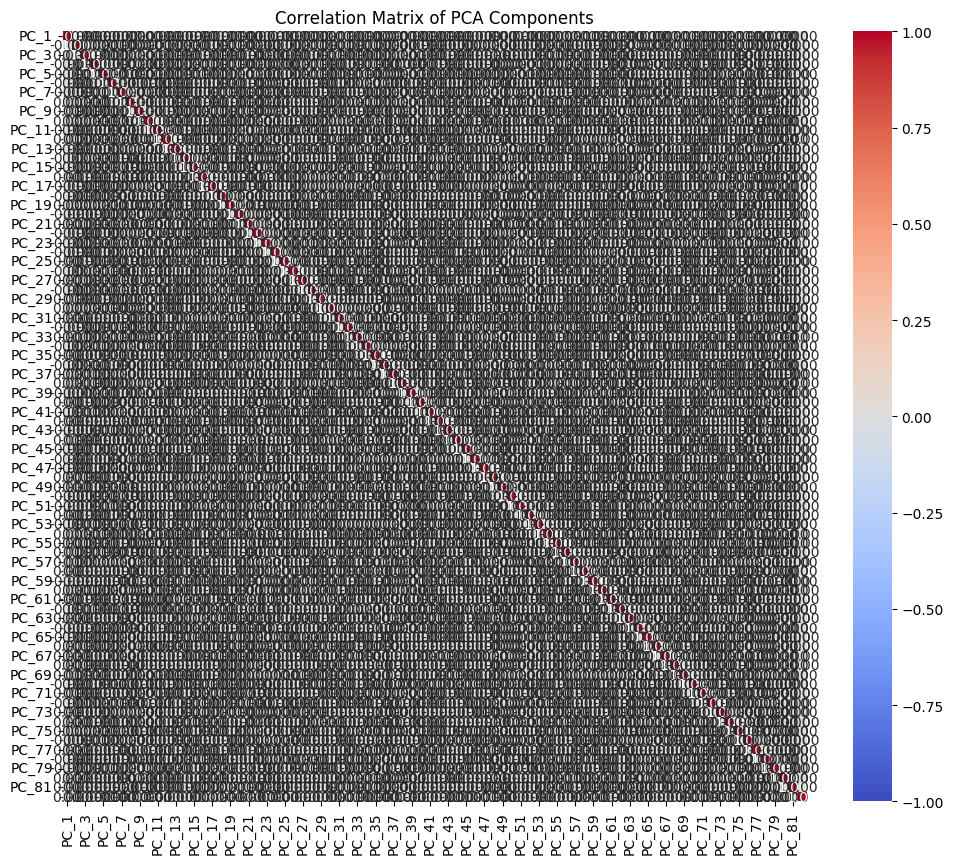

In [ ]:
# Correlation matrix for numerical features (PCA components)
corr_matrix = processed_data.drop(columns=['Label']).corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", vmax=1, vmin=-1, center=0)
plt.title("Correlation Matrix of PCA Components")
plt.show()


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features and target label
X = processed_data.drop(columns=["Label"])
y = processed_data["Label"]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())


       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -0.536974 -0.225531 -0.186652  0.836673  0.259215 -0.720026 -0.725492   
1  1.206295  1.888761  0.828784 -1.675952 -1.157663  0.143875  0.024115   
2 -0.308405  0.387655 -0.007267 -0.108155 -1.320912  0.385368  1.012625   
3 -0.709565 -0.733142 -1.114518 -0.255110  0.430658 -0.945549 -0.253003   
4 -0.805334 -0.503082 -1.141818 -0.575187  0.482898 -0.887141  0.712582   

       PC_8      PC_9     PC_10  ...     PC_73     PC_74     PC_75     PC_76  \
0 -0.601291  1.306280 -0.195157  ... -0.396709  1.262973 -0.150673 -0.943761   
1 -0.295041 -2.706945 -2.210120  ... -0.872969  1.684565 -4.318505 -0.592770   
2 -0.208206  1.119634  0.586487  ...  0.270571 -0.994971 -0.260810  0.264707   
3  0.337628 -0.281040 -0.038314  ... -0.466082  0.664921 -0.130710 -0.577048   
4  0.505050  0.521364  0.611210  ... -0.292473  0.138524 -0.107700 -0.577326   

      PC_77     PC_78     PC_79     PC_80     PC_81     PC_82  
0 -0

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1430, 82)
Testing data shape: (358, 82)


Model Implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models and their accuracy
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Display accuracy of all models
print("\nModel Accuracy Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")



Logistic Regression Classification Report:

              precision    recall  f1-score   support

        fake       0.83      0.88      0.86       187
        real       0.86      0.81      0.83       171

    accuracy                           0.85       358
   macro avg       0.85      0.84      0.85       358
weighted avg       0.85      0.85      0.85       358


Support Vector Machine Classification Report:

              precision    recall  f1-score   support

        fake       0.93      0.92      0.93       187
        real       0.91      0.93      0.92       171

    accuracy                           0.92       358
   macro avg       0.92      0.92      0.92       358
weighted avg       0.92      0.92      0.92       358


Random Forest Classification Report:

              precision    recall  f1-score   support

        fake       0.90      0.90      0.90       187
        real       0.89      0.89      0.89       171

    accuracy                           0.89       

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.5885 - loss: 0.6713 - val_accuracy: 0.7867 - val_loss: 0.5825
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7485 - loss: 0.5727 - val_accuracy: 0.7727 - val_loss: 0.5298
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7994 - loss: 0.4984 - val_accuracy: 0.8112 - val_loss: 0.4471
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8159 - loss: 0.4205 - val_accuracy: 0.8601 - val_loss: 0.3780
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8698 - loss: 0.3367 - val_accuracy: 0.8462 - val_loss: 0.3600
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9072 - loss: 0.2726 - val_accuracy: 0.8462 - val_loss: 0.3575
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9148 - loss: 0.2203 - val_accuracy: 0.8741 - val_loss: 0.3024
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9434 - loss: 0.1664 - val_accuracy: 0.8811 - 

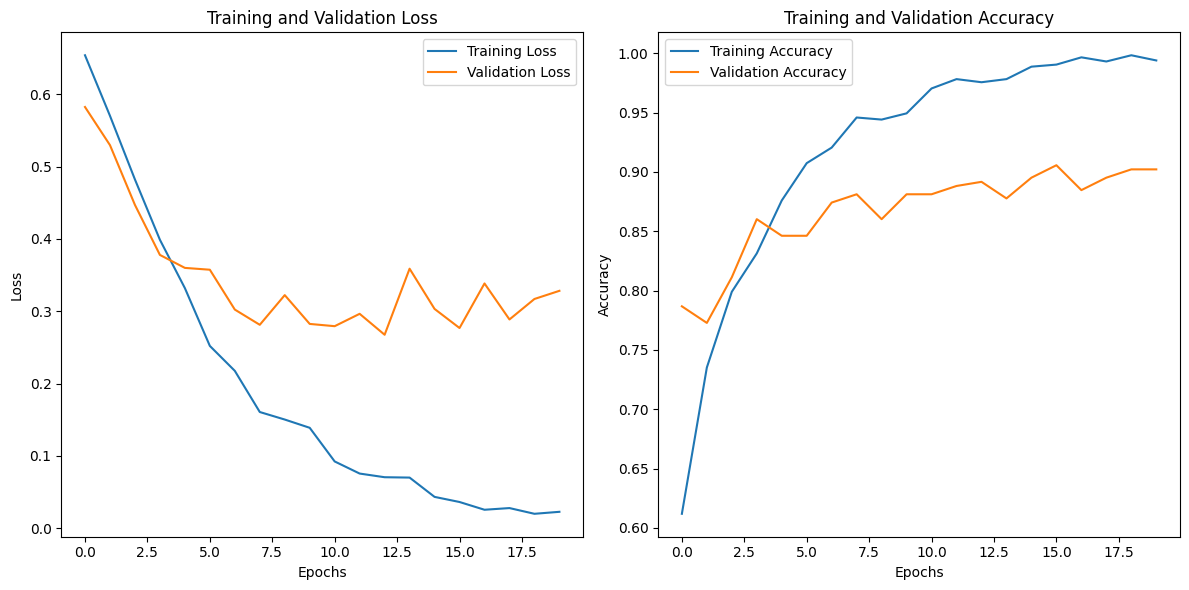

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Prepare the data
# Reshape X to (samples, features, 1) for 1D CNN
X_train_cnn = np.expand_dims(X_train.values, axis=2)
X_test_cnn = np.expand_dims(X_test.values, axis=2)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the labels for CNN
y_train_cnn = to_categorical(y_train_encoded)
y_test_cnn = to_categorical(y_test_encoded)

# Step 2: Build the CNN Model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train_cnn.shape[1], activation='softmax')  # Output layer
])

# Step 3: Compile the Model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the Model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 6: Plot Training Loss and Accuracy
# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


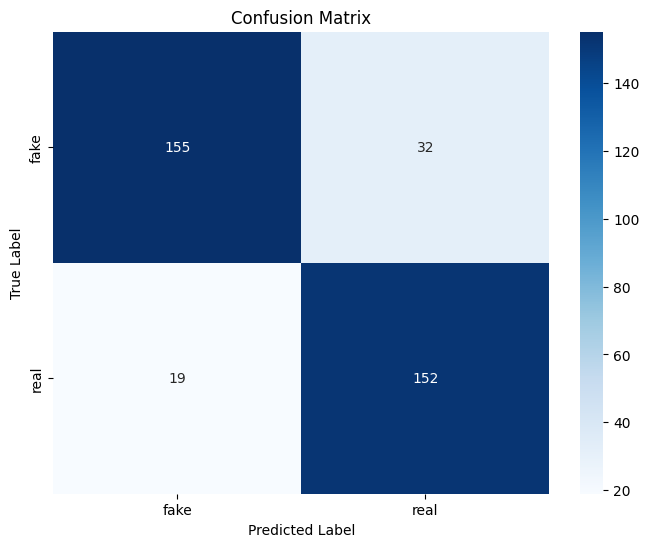

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       187
           1       0.83      0.89      0.86       171

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.86      0.86      0.86       358



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions on the test set
y_pred = cnn_model.predict(X_test_cnn)  # Model predictions

# Step 2: Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true_classes = np.argmax(y_test_cnn, axis=1)  # True class labels

# Step 3: Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Clssification Report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 10}
Best Score: 0.9328671328671329


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Stratified K-Fold for balanced label distribution in splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y_encoded, cv=skf, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


Logistic Regression: Mean Accuracy = 0.8770, Std = 0.0078
Support Vector Machine: Mean Accuracy = 0.9323, Std = 0.0156
Random Forest: Mean Accuracy = 0.8954, Std = 0.0135
Gradient Boosting: Mean Accuracy = 0.8926, Std = 0.0131
k-Nearest Neighbors: Mean Accuracy = 0.8893, Std = 0.0053
